### GW/CLIFF

Implement cliff walking

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
class GridCliff:
    
    def __init__(self, h, w):
        self.w = w
        self.h = h
        
        self.actions = [0, 1, 2, 3] #up, down, left, right
        
        self.start = h*w
        self.goal = (h+1)*w-1
        self.states = [s for s in range(h*w)] + [self.start, self.goal]
        self.cliff = [s for s in range(self.start+1, self.goal)]
        
        #### state numbering ####
        # 0  1  2  3  4  5 
        # 6  7  8  9  10 11
        # 12 13 14 15 16 17
        # 18 #  #  #  #  23
        
        # 18 and 23 are the final states
        #### state numbering ####
        
    def state_coordinates(self, s):
        return (s // self.w, s % self.w)
    
    def visualize(self):
        vis = np.ones((self.h+1, self.w))
        
        for s in self.states:
            vis[self.state_coordinates(s)] = -1
            
        for s in self.cliff:
            vis[self.state_coordinates(s)] = 0
            
        vis[self.state_coordinates(self.start)] = 1
        vis[self.state_coordinates(self.goal)] = 1
        
        plt.imshow(vis)
        
    def step(self, s, a):
        assert s in (self.states + [self.start, self.goal]), f'{s=} not valid.'
        
        action_values = [-self.w, +self.w, -1, +1]
        sprime = s + action_values[a]
        
        if sprime in self.cliff:
            return self.start, -100
        elif (s // self.w) != (sprime // self.w) and a > 1: # out horizontally
            return s, -1
        elif sprime not in self.states: # out vertically
            return s, -1
        else:
            return sprime, -1

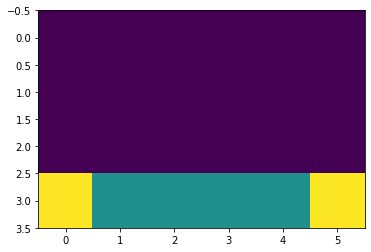

In [29]:
grid = GridCliff(3,6)
grid.visualize()